In [55]:
import pandas as pd
import geopandas as gpd

covid_data = pd.read_csv('Covid.csv')
covid_data['NOME_REG'] = covid_data['NOME_REG'].str.lower()
geo_df = gpd.read_file('reg2011_g.shp')
geo_df['NOME_REG'] = geo_df['NOME_REG'].str.lower()
merged_df = pd.merge(right=covid_data, left=geo_df, on='NOME_REG')
merged_df.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death
0,1,piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0
1,3,lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0
2,5,veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0
3,7,liguria,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",7508.0,1114.0
4,8,emilia-romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0


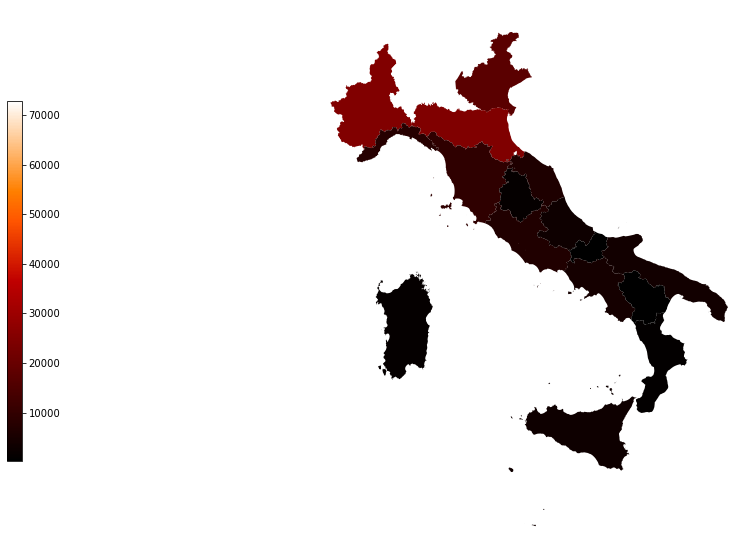

In [56]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
column_name = 'Confirmed'
cmap = 'gist_heat'
merged_df.plot(column_name, ax=ax, cmap=cmap)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=merged_df[column_name].min(), vmax=merged_df[column_name].max()), cmap=cmap)
color_bar_axes = fig.add_axes([0.15, 0.25, 0.01, 0.5])
fig.colorbar(sm, cax=color_bar_axes)